In [ ]:
import pandas as pd
import numpy as np
import cPickle as pickle
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [240]:
path = '../../../../../fireplace_datasets/widened_piece_csvs/wide%d.csv'

In [241]:
df1 = pd.read_csv(path % 1)

In [242]:
df1.head()

,event_id,player,game_id,player_event_num,game_turn,first_player,player_won,attacker[at_010],attacker[at_012],attacker[at_017],...,discover_choices[new1_040],discover_choices[og_073],hero_power[target: scarlet purifier],enemy_hero_power[target: scarlet purifier],choice[at_084],choice[new1_029],choice[ex1_016],choice[ex1_622],choice[ex1_561],discover_choices[at_070]
0,3965854,player1,9d11688e-380d-11e6-8f0a-0a06d1565ad7,1,20,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3965875,player1,9d11688e-380d-11e6-8f0a-0a06d1565ad7,3,20,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3965882,player1,9d11688e-380d-11e6-8f0a-0a06d1565ad7,4,20,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3965889,player1,9d11688e-380d-11e6-8f0a-0a06d1565ad7,5,20,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3965896,player1,9d11688e-380d-11e6-8f0a-0a06d1565ad7,6,20,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [243]:
df1.shape

(6422, 9091)

In [265]:
mnb = MultinomialNB()

In [245]:
columns = df1.columns
# should I include game_turn in preds? and remove player_event_num?
preds = [col for col in columns if col not in ['event_id', 'player', 'game_id', 'game_turn', 'game_event_id']]

In [266]:
df1.fillna(value = 0, inplace = True)
y = df1.player_won
X = df1[preds]
mnb.partial_fit(X, y, classes = [0, 1])
scores = cross_val_score(mnb, X, y, cv = 11)
print scores
print scores.mean()

[ 0.6991453   0.67123288  0.77568493  0.80821918  0.79965753  0.72431507
  0.9880137   1.          0.60548885  1.          0.59005146]
0.787437172324


In [263]:
df250 = pd.read_csv(path % 250, names = columns, skiprows = 1)
df250.fillna(value = 0, inplace = True)
y_test = df250.player_won
X_test = df250[preds]

def test_mnb():
    roc_auc_score(y, mnb_preds)
#     mnb_preds = mnb.predict(X_test)
#     print accuracy_score(y_test, mnb_preds), np.mean(y_test)

In [247]:
def mnb_partial(df):
    y = df.player_won
    X = df[preds]
    mnb.partial_fit(X, y)
#     scores = cross_val_score(mnb, X, y, cv = 7)
#     return scores.mean()

In [267]:
for i in range(2, 250):
    # must skip 1st row because original header is prepended to the df as a result
    # of the "names" parameter. probably an easier way to do this but I don't give a fuck
    # df = pd.read_csv(path % i, names = columns, skiprows = 1)
    f = open(path % 1,'rb')
    df = cPickle.load(f)
    df.fillna(value = 0, inplace = True)
    print "Fitting batch #%d..." % i
    mnb_partial(df)
    if i > 10:
        test_mnb()
    f.close()

Fitting batch #2...
0.530983606557 0.46868852459
Fitting batch #3...
0.589180327869 0.46868852459
Fitting batch #4...
0.525081967213 0.46868852459
Fitting batch #5...
0.517049180328 0.46868852459
Fitting batch #6...
0.654590163934 0.46868852459
Fitting batch #7...
0.519672131148 0.46868852459
Fitting batch #8...
0.693606557377 0.46868852459
Fitting batch #9...
0.542786885246 0.46868852459
Fitting batch #10...
0.711803278689 0.46868852459
Fitting batch #11...
0.711639344262 0.46868852459
Fitting batch #12...
0.74262295082 0.46868852459
Fitting batch #13...
0.499672131148 0.46868852459
Fitting batch #14...
0.496393442623 0.46868852459
Fitting batch #15...
0.793606557377 0.46868852459
Fitting batch #16...
0.783278688525 0.46868852459
Fitting batch #17...
0.758360655738 0.46868852459
Fitting batch #18...
0.719836065574 0.46868852459
Fitting batch #19...
0.499508196721 0.46868852459
Fitting batch #20...
0.488032786885 0.46868852459
Fitting batch #21...
0.485409836066 0.46868852459
Fitting b

KeyboardInterrupt: 

0.471639344262


In [254]:
print(classification_report(y, mnb_preds))

             precision    recall  f1-score   support

          0       1.00      0.01      0.01      3241
          1       0.47      1.00      0.64      2859

avg / total       0.75      0.47      0.31      6100



In [255]:
pd.crosstab(y, mnb_preds, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,18,3223,3241
1,0,2859,2859
All,18,6082,6100


In [256]:
fpr, tpr, thresholds = roc_curve(y, mnb_preds, pos_label=1)

In [257]:
mnb_roc_auc = roc_auc_score(y, mnb_preds)
print mnb_roc_auc

0.502776920703


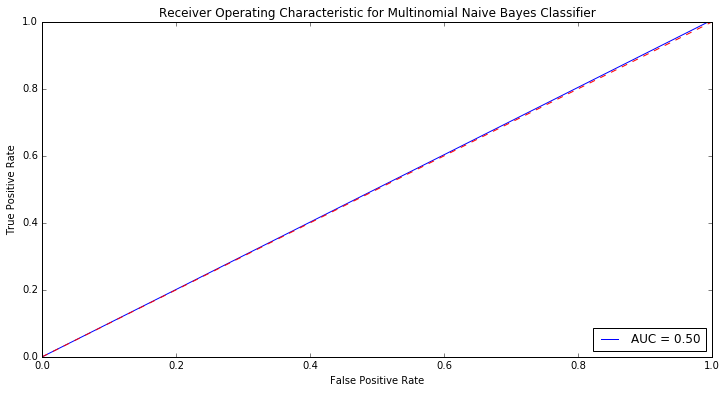

In [258]:
plt.figure(figsize=(12, 6))
plt.title('Receiver Operating Characteristic for Multinomial Naive Bayes Classifier')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% mnb_roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0, 1.0])
plt.ylim([0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [259]:
mnb.coef_[0]
features = {preds[i]: mnb.coef_[0][i] for i in range(len(preds))}

In [260]:
import operator
sorted_features = sorted(features.items(), key=operator.itemgetter(1), reverse = True)

In [261]:
sorted_features

[('player_event_num', -1.1643453532681889),
 ('attacker[ex1_116]', -4.5478232868447179),
 ('card_played[cs2_063]', -4.9254040741425609),
 ('attacker[at_084]', -4.9774404543032436),
 ('attacker[at_117]', -5.0380476251609121),
 ('enemy_hero_power[target: feugen]', -5.0529465149860169),
 ('enemy_card_played[og_337]', -5.0959224249366528),
 ('attacker[brm_020]', -5.1160526511029101),
 ('attacker[og_006a]', -5.1374429880021708),
 ('attacker[brm_010]', -5.1428780886816305),
 ('card_played[ex1_334]', -5.196790377017706),
 ('attacker[ex1_559]', -5.2055450199448892),
 ('attacker[fp1_016]', -5.2216794413842251),
 ('enemy_hero_power[target: master swordsmith]', -5.2242052186241121),
 ('attacker[gvg_071]', -5.2287098246459127),
 ('attacker[gvg_104]', -5.2608106089541238),
 ('attacker[fp1_012t]', -5.2730502653056277),
 ('attacker[new1_026]', -5.3369997391395252),
 ('card_played[at_044]', -5.3429299706253417),
 ('attacker[ex1_105]', -5.4142237794739465),
 ('attacker[cs2_146]', -5.4527110650668096),


In [98]:
sgd = SGDClassifier(loss = 'log')

In [99]:
df1.fillna(value = 0, inplace = True)
y = df1.player_won
X = df1[preds]
sgd.partial_fit(X, y, classes = [0, 1])

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [100]:
def sgd_partial(df):
    y = df.player_won
    X = df[preds]
    sgd.partial_fit(X, y)
#     scores = cross_val_score(sgd, X, y, cv = 7)
#     return scores.mean()

In [101]:
for i in range(2, 30):
    # must skip 1st row because original header is prepended to the df as a result
    # of the "names" parameter. probably an easier way to do this but I don't give a fuck
    df = pd.read_csv(path % i, names = columns, skiprows = 1)
    df.fillna(value = 0, inplace = True)
    print "Fitting batch #%d..." % i
    sgd_partial(df)

Fitting batch #2...
Fitting batch #3...
Fitting batch #4...
Fitting batch #5...
Fitting batch #6...
Fitting batch #7...
Fitting batch #8...
Fitting batch #9...
Fitting batch #10...
Fitting batch #11...
Fitting batch #12...
Fitting batch #13...
Fitting batch #14...
Fitting batch #15...
Fitting batch #16...
Fitting batch #17...
Fitting batch #18...
Fitting batch #19...
Fitting batch #20...
Fitting batch #21...
Fitting batch #22...
Fitting batch #23...
Fitting batch #24...
Fitting batch #25...
Fitting batch #26...
Fitting batch #27...
Fitting batch #28...
Fitting batch #29...


In [102]:
df30 = pd.read_csv(path % 30, names = columns, skiprows = 1)

In [103]:
df30.fillna(value = 0, inplace = True)

In [104]:
preds = [col for col in df30.columns if col not in ['event_id', 'player', 'game_id', 'game_turn', 'game_event_id']]
y = df30.player_won
X = df30[preds]

In [105]:
sgd_preds = sgd.predict(X)

In [107]:
print(accuracy_score(y, sgd_preds))

0.555783817952


In [108]:
print(classification_report(y, sgd_preds))

             precision    recall  f1-score   support

          0       0.54      1.00      0.70      3332
          1       1.00      0.06      0.12      2996

avg / total       0.76      0.56      0.43      6328



In [109]:
pd.crosstab(y, sgd_preds, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,3332,0,3332
1,2811,185,2996
All,6143,185,6328


In [110]:
fpr, tpr, thresholds = roc_curve(y, sgd_preds, pos_label=1)

In [111]:
sgd_roc_auc = roc_auc_score(y, sgd_preds)
print sgd_roc_auc

0.530874499332


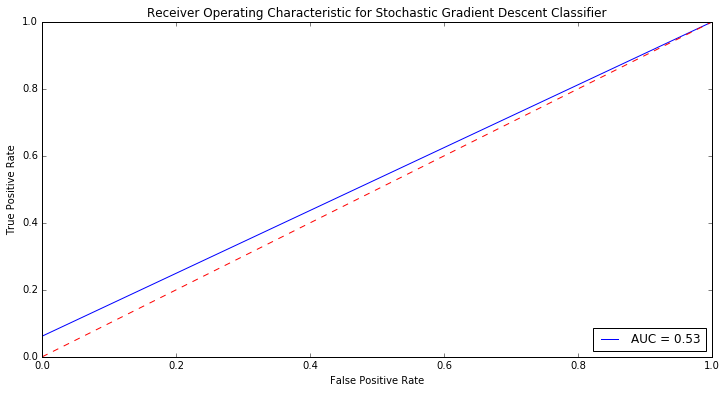

In [112]:
plt.figure(figsize=(12, 6))
plt.title('Receiver Operating Characteristic for Stochastic Gradient Descent Classifier')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% sgd_roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
dtc = DecisionTreeClassifier()

In [89]:
preds = [col for col in df1.columns if col not in ['event_id', 'player', 'game_id', 'game_turn', 'game_event_id']]

def bag_partial(df):
    y = df.player_won
    X = df[preds]
    bag = BaggingClassifier(dtc, max_samples = 25, warm_start = True)
    bag.fit(X, y)

In [90]:
for i in range(2, 10):
    # must skip 1st row because original header is prepended to the df as a result
    # of the "names" parameter. probably an easier way to do this but I don't give a fuck
    df = pd.read_csv(path % i, names = columns, skiprows = 1)
    df.fillna(value = 0, inplace = True)
    print "Fitting batch #%d..." % i
    print bag_partial(df)

Fitting batch #2
1.0
Fitting batch #3
1.0
Fitting batch #4
1.0


KeyboardInterrupt: 